Final Project UAS - komputasi Statistika

Nama Anggota Kelompok E:
- Aulia Nisrina Rosanita / 2206051380
- Angelia Huwinata / 2206051595
- Renata Shaula Alfino Ritonga / 2206815812
- Amira Shohifa / 2206829130
- Zavier Raiyan Dana / 2206829875

In [ ]:
#Import library yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import scipy as sp
from scipy import stats
from random import sample
from math import fsum, sqrt
from collections import defaultdict
from functools import partial
import plotly as py
from timeit import default_timer as timer

import matplotlib.gridspec as gridspec
from pandas.api.types import CategoricalDtype
%matplotlib inline

# Importing Data

In [ ]:
#Code ini bertujuan agar user dapat berinteraksi dengan Google Drive dan dapat menggunakan kode Python untuk melakukan berbagai operasi pada file dan folder di Google Drive.
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials


auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
#Mendownload kemudian membaca file dari link google drive
link = 'https://drive.google.com/file/d/16OtLnKSv5z9mD-yE7EPfS09C1oUPGmXJ/view'

id = link.split("/")[-2]

downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('data_kesehatan-Mental-SRQ-2023--Filtered.csv')

df = pd.read_csv('data_kesehatan-Mental-SRQ-2023--Filtered.csv')

<ipython-input-99-a67a266ed37a>:9: DtypeWarning:

Columns (6,77) have mixed types. Specify dtype option on import or set low_memory=False.



# Preprocessing Data

In [ ]:
#Menampilkan 10 baris data bersama
df.head(10)

,ID,WILAYAH,JENIS KELAMIN,USIA,LAMA BERDINAS,PENDIDIKAN TERAKHIR,TINGGI BADAN,BERAT BADAN,LINGKAR PINGGANG,Status Perkawinan,...,Sumber air bersih di tempat tinggal saudara ?,Penggunaan air bersih untuk makan & minum bersumber dari :,Berapa jarak jamban dengan sumur dirumah saudara ?,Bagaimana saluran pembuangan air (sanitasi) rumah tangga?,Apakah terdapat tempat sampah di sekitar rumah?,Berapa jarak tempat sampah dengan rumah saudara ?,Apakah di sekitar tempat tinggal Saudara tersedia fasilitas umum (fasum) untuk kegiatan/aktivitas olah raga?,Kelompok Umur,NILAI IMT,IMT
0,1,KALBAR,LAKI - LAKI,34.0,16.0,SMA,168.9,85.00,100.0,Menikah,...,Air PAM,Tadah hujan,Lebih dari 12 meter,Ada,"Ada, terbuka",Lebih dari 10 meter,Tidak ada,25 - 34,29.80,Obesitas
1,2,KALBAR,LAKI - LAKI,43.0,23.0,SMA,169.5,70.00,80.0,Menikah,...,Air PAM,Air mineral isi ulang,Lebih dari 12 meter,Ada,"Ada, tertutup",Lebih dari 10 meter,Tidak ada,35 - 44,24.36,Normal
2,3,KALBAR,LAKI - LAKI,21.0,1.0,SMA,169.5,60.00,78.0,Belum Menikah,...,Air PAM,Air mineral isi ulang,Tidak memiliki jamban sehat,Ada,Tidak ada,NaN,Tidak ada,15 - 24,20.88,Normal
3,4,KALBAR,LAKI - LAKI,40.0,23.0,S2,166.8,80.00,34.0,Menikah,...,Air PAM,Air mineral isi ulang,Tidak memiliki jamban sehat,Ada,"Ada, tertutup",Lebih dari 10 meter,Tidak ada,35 - 44,28.75,Obesitas
4,5,KALBAR,LAKI - LAKI,28.0,9.0,SMA,164.5,62.00,32.0,Menikah,...,Air PAM,Air mineral isi ulang,Lebih dari 12 meter,Ada,"Ada, tertutup",Lebih dari 10 meter,Ada,25 - 34,22.91,Normal
5,6,KALBAR,LAKI - LAKI,47.0,25.0,SMP,165.5,63.00,32.0,Menikah,...,Air PAM,Tadah hujan,Lebih dari 12 meter,Ada,Tidak ada,NaN,Tidak ada,45 - 54,23.00,Normal
6,7,KALBAR,LAKI - LAKI,41.0,20.0,S1,168.5,71.00,90.0,Menikah,...,Air PAM,Tadah hujan,Lebih dari 12 meter,Ada,Tidak ada,NaN,Tidak ada,35 - 44,25.01,Gemuk
7,8,KALBAR,LAKI - LAKI,28.0,10.0,S1,175,69.55,31.0,Menikah,...,Sumur/Kali,Air sumur,Lebih dari 12 meter,Ada,"Ada, terbuka",Lebih dari 10 meter,Ada,25 - 34,22.71,Normal
8,9,KALBAR,LAKI - LAKI,23.0,3.0,SMA,172.5,74.00,32.0,Belum Menikah,...,Sumur/Kali,Air mineral kemasan,Lebih dari 12 meter,Ada,"Ada, terbuka",Kurang dari 10 meter,Tidak ada,15 - 24,24.87,Normal
9,10,KALBAR,LAKI - LAKI,41.0,20.0,SMA,165.5,82.00,45.0,Menikah,...,Sumur/Kali,Air sumur,Kurang dari 12 meter,Ada,"Ada, tertutup",Lebih dari 10 meter,Ada,35 - 44,29.94,Obesitas


In [ ]:
#Menampilkan informasi jumlah baris, missing value, dan tipe data dari DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289801 entries, 0 to 289800
Data columns (total 79 columns):
 #   Column                                                                                                             Non-Null Count   Dtype  
---  ------                                                                                                             --------------   -----  
 0   ID                                                                                                                 289801 non-null  int64  
 1   WILAYAH                                                                                                            289801 non-null  object 
 2   JENIS KELAMIN                                                                                                      289801 non-null  object 
 3   USIA                                                                                                               289801 non-null  float64
 4   LAMA BERDINAS 

In [ ]:
#Mengubah tipe data kolom NILAI IMT dalam DataFrame menjadi tipe data numerik.
df['NILAI IMT'] = pd.to_numeric(df['NILAI IMT'], errors='coerce')

In [ ]:
#Melakukan drop kolom ID dari DataFrame
df.drop(['ID'], axis=1, inplace=True)

In [ ]:
#Melakukan drop pada baris duplicate
#Mengecek jumlah missing value untuk setiap kolom
df.drop_duplicates()
df.isnull().sum()

WILAYAH                                                                                                             0
JENIS KELAMIN                                                                                                       0
USIA                                                                                                                0
LAMA BERDINAS                                                                                                       0
PENDIDIKAN TERAKHIR                                                                                                 0
                                                                                                                ...  
Berapa jarak tempat sampah dengan rumah saudara ?                                                               41649
Apakah di sekitar tempat tinggal Saudara tersedia fasilitas umum (fasum) untuk kegiatan/aktivitas olah raga?        0
Kelompok Umur                                           

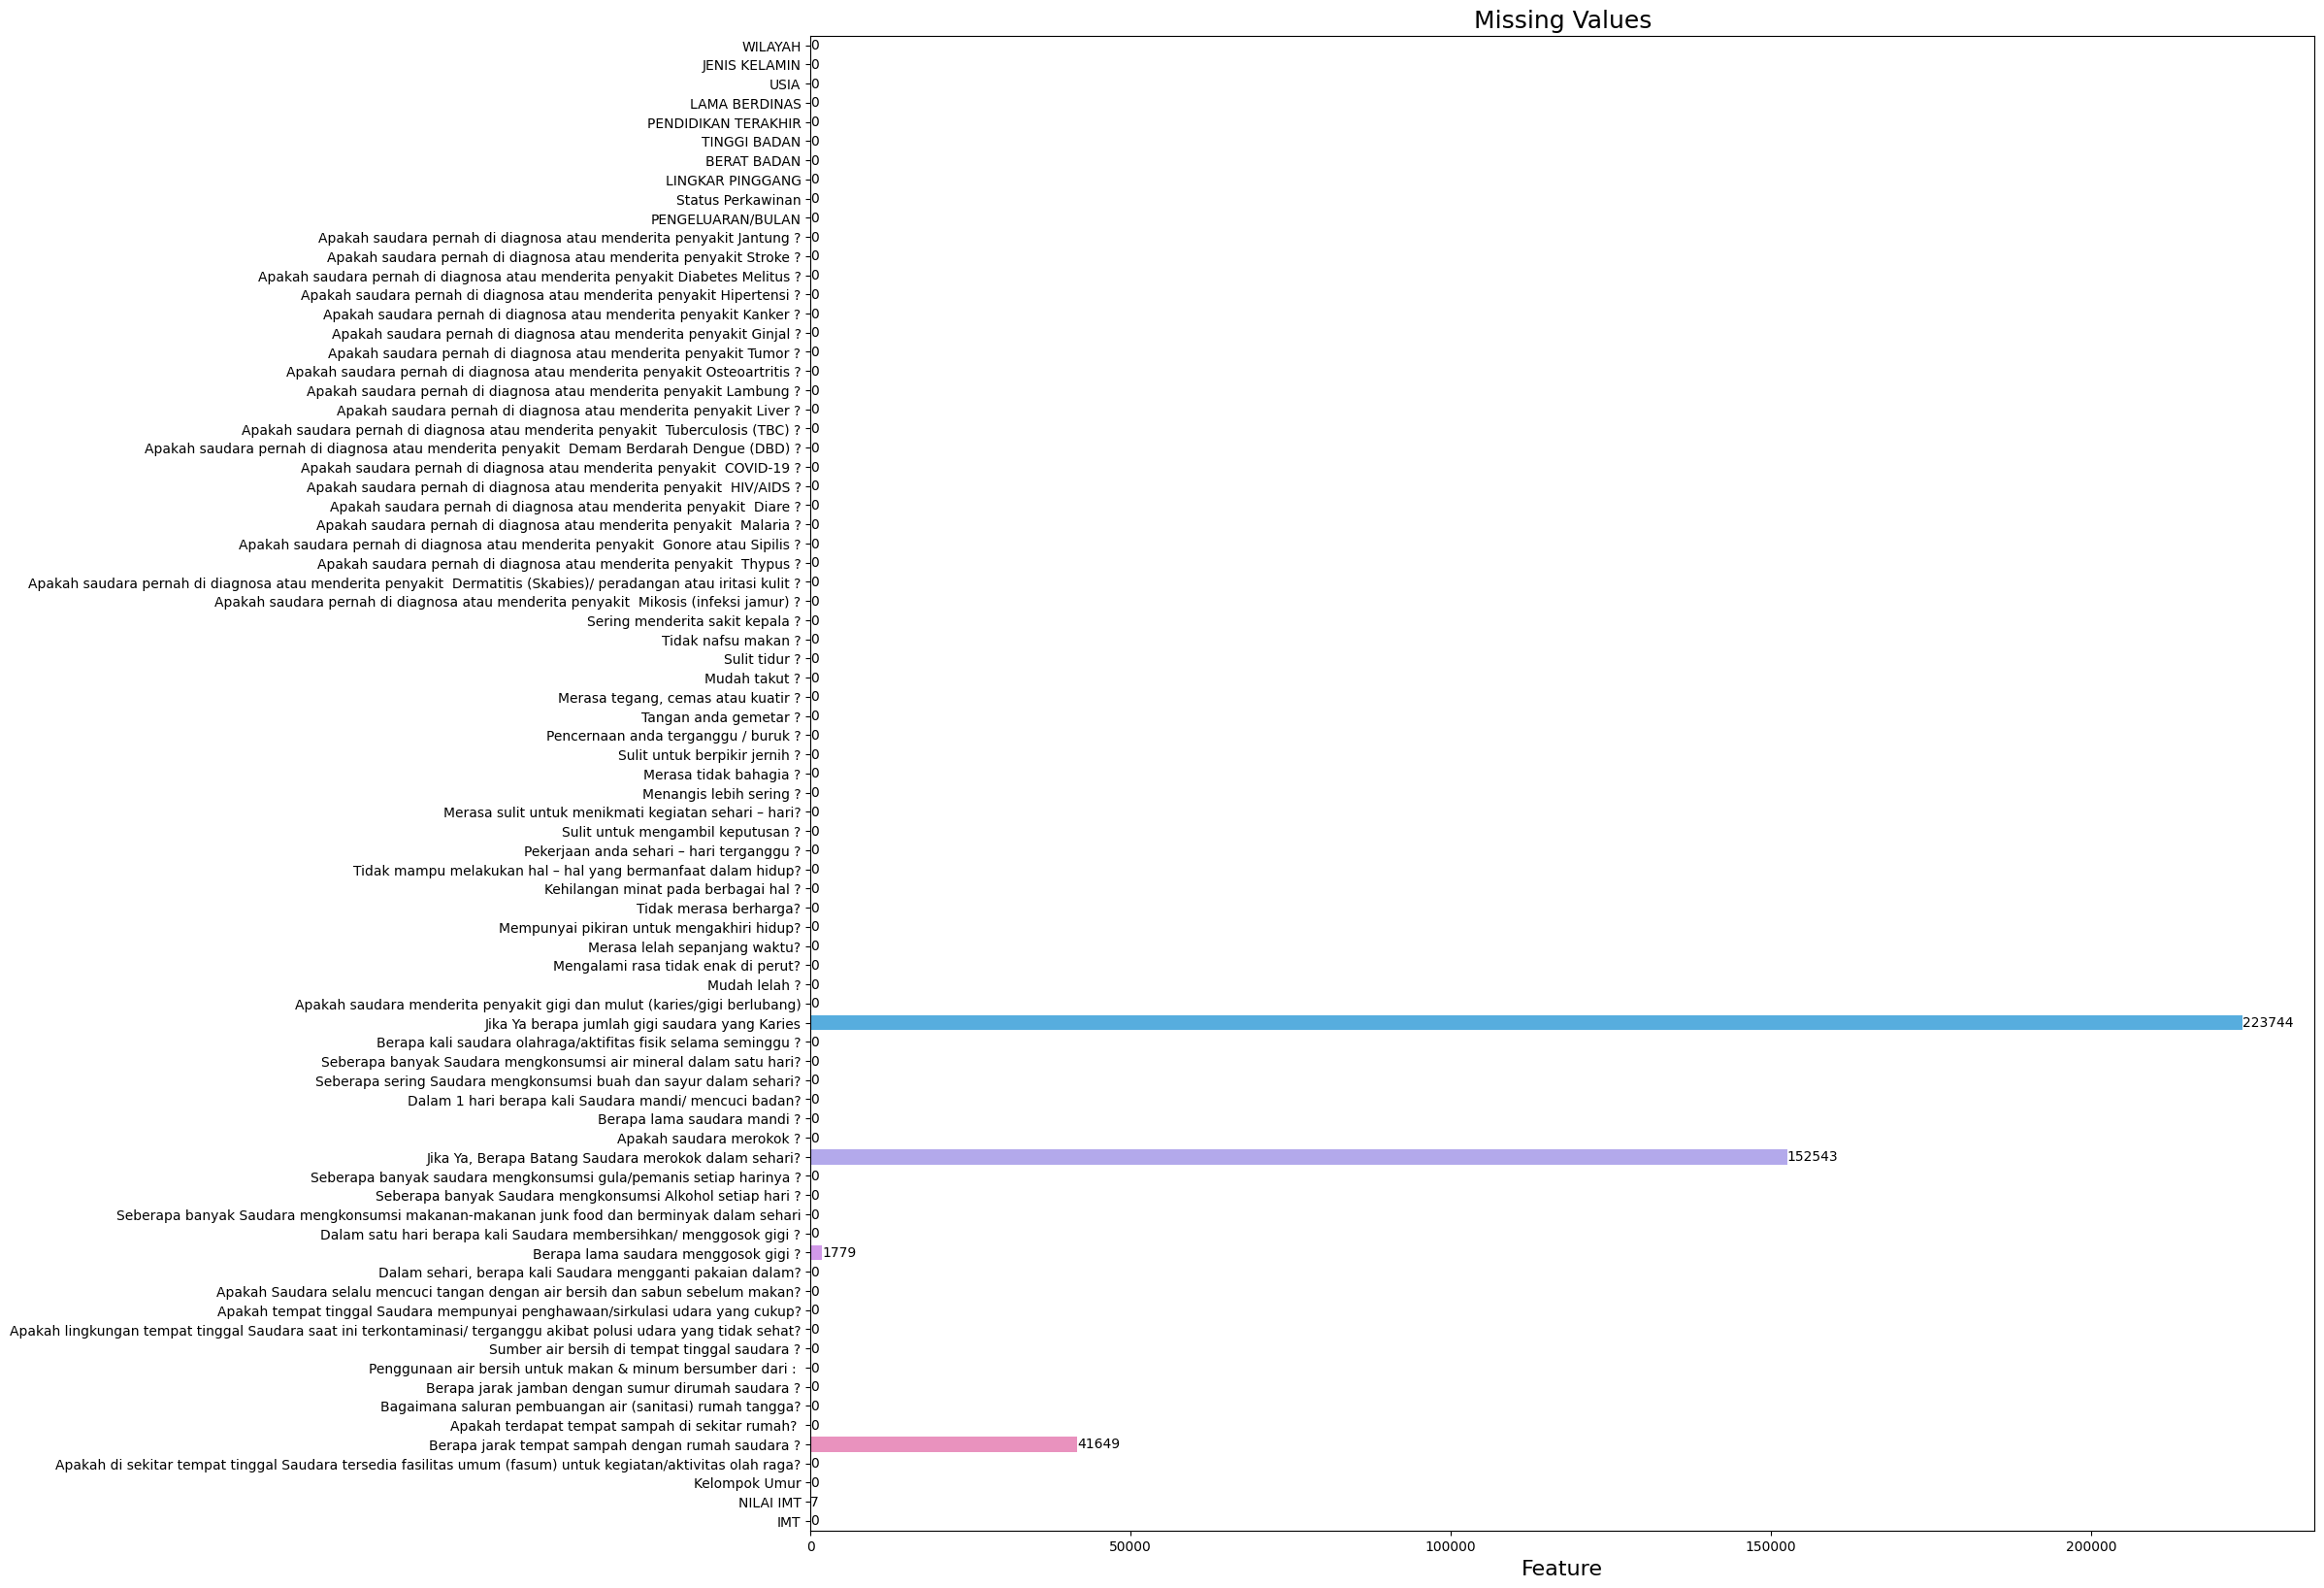

In [ ]:
#Memvisualisasikan jumlah missing values dalam setiap kolom
missing_value = pd.DataFrame(df.isnull().sum())
missing_value = missing_value.rename(columns = {0 : 'Missing Values Sum'})

fig, ax = plt.subplots(figsize=(20,20), dpi=100)
sns.barplot(missing_value, y=missing_value.index, x='Missing Values Sum')

plt.title('Missing Values', fontsize=18)
plt.xlabel('Feature', fontsize=16)
ax.bar_label(ax.containers[0])
plt.show()

In [ ]:
#Melakukan drop baris nilai null pada kolom 'NILAI IMT'
df = df.dropna(subset = 'NILAI IMT')

In [ ]:
#Drop kolom yang memiliki banyak missing value dan tidak bisa di impute
df.drop(['Berapa lama saudara menggosok gigi ?'], axis=1, inplace=True)
pertanyaan_optional = {'Jika Ya berapa jumlah gigi saudara yang Karies','Jika Ya, Berapa Batang Saudara merokok dalam sehari?','Berapa jarak tempat sampah dengan rumah saudara ?'}
df[pertanyaan_optional].isnull().sum()

<ipython-input-107-fb08962797d6>:4: FutureWarning:

Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.



Berapa jarak tempat sampah dengan rumah saudara ?        41646
Jika Ya berapa jumlah gigi saudara yang Karies          223739
Jika Ya, Berapa Batang Saudara merokok dalam sehari?    152539
dtype: int64

In [ ]:
#Mengganti nilai null dalam data dengan nilai 0
df = df.fillna(0)
df[pertanyaan_optional].isnull().sum()

<ipython-input-108-384876e73ddd>:3: FutureWarning:

Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.



Berapa jarak tempat sampah dengan rumah saudara ?       0
Jika Ya berapa jumlah gigi saudara yang Karies          0
Jika Ya, Berapa Batang Saudara merokok dalam sehari?    0
dtype: int64

In [ ]:
#Drop kolom tinggi badan karena terlalu banyak kesalahan input dari responden sehingga menyebabkan unique value sangat banyak dan tidak akurat
df.drop(['TINGGI BADAN'], axis=1, inplace=True)

In [ ]:
#Mengecek nilai unik dalam setiap kolom yang memiliki tipe data kategorikal
for column in df.columns:
    if df[column].dtype == 'object':
        unique_values = df[column].unique()
        print(f"Unique values in {column}:", unique_values)

Unique values in WILAYAH: ['KALBAR' 'BENGKULU' 'SULSEL' 'SULUT' 'KEPRI' 'NTT' 'JATIM' 'SULTENG'
 'JAMBI' 'SUMUT' 'JABAR' 'ACEH' 'BALI' 'BANTEN' 'DIY' 'GORONTALO' 'JATENG'
 'KALSEL' 'KALTENG' 'KALTIM' 'KALTARA' 'BABEL' 'LAMPUNG' 'MALUKU' 'MALUT'
 'METROJAYA' 'NTB' 'PAPUA' 'PABAR' 'RIAU' 'SULBAR' 'SULTRA' 'SUMBAR'
 'SUMSEL']
Unique values in JENIS KELAMIN: ['LAKI - LAKI' 'PEREMPUAN']
Unique values in PENDIDIKAN TERAKHIR: ['SMA' 'S2' 'SMP' 'S1' 'D3' 'S3']
Unique values in Status Perkawinan: ['Menikah' 'Belum Menikah' 'Duda' 'Janda']
Unique values in PENGELUARAN/BULAN: ['Rp. 7 Juta s.d. 10 Juta' 'Rp. 2 Juta s.d. 6 Juta'
 'Rp. 11 Juta s.d. 14 Juta' 'Di atas Rp. 15 Juta']
Unique values in Apakah saudara pernah di diagnosa atau menderita penyakit Jantung ?: ['Tidak' 'Ya']
Unique values in Apakah saudara pernah di diagnosa atau menderita penyakit Stroke ?: ['Tidak' 'Ya']
Unique values in Apakah saudara pernah di diagnosa atau menderita penyakit Diabetes Melitus ?: ['Tidak' 'Ya']
Unique values 

In [ ]:
#Memilih tipe data number dari DataFrame dan menyimpannya ke DataFrame baru
data_numerik = df.select_dtypes(include=['number'])

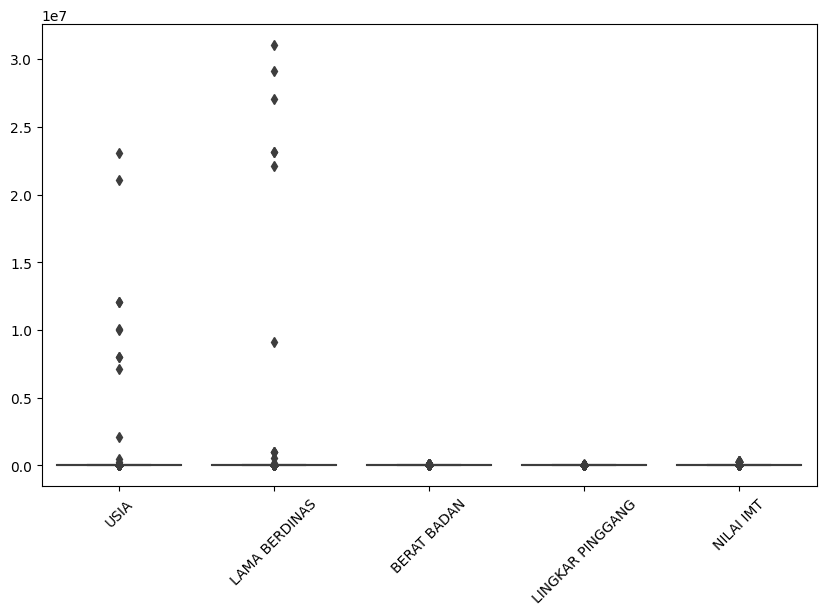

In [ ]:
#Memvisualisasikan outlier pada data numerik
plt.figure(figsize=(10, 6))
sns.boxplot(data = data_numerik)
plt.xticks(rotation = 45)
plt.show()

In [ ]:
#Code untuk menghitung IQR dan mengecek outlier di kolom 'USIA'
# IQR
import numpy as np
Q1 = np.percentile(df['USIA'], 25, method='midpoint')
Q3 = np.percentile(df['USIA'], 75, method='midpoint')
IQR =  Q3 - Q1
print('IQR:', IQR)

# Above Upper bound
upper=  Q3 + 1.5*IQR
upper_array=np.array(df['USIA']>=upper)
print("Upper Bound:",upper)
print("Outlier above upper bound: ", upper_array.sum())

#Below Lower bound
lower=  Q1 - 1.5*IQR
lower_array=np.array(df['USIA']<=lower)
print("Lower Bound:",lower)
print('Outlier below lower bound:', lower_array.sum())

# Create arrays of Boolean values indicating the outlier rows
upper_array = np.where(df['USIA']>=upper)[0]
lower_array = np.where(df['USIA']<=lower)[0]
print('Outlier above lower bound for USIA')
print(upper_array)
print('Outlier below lower bound for USIA')
print(lower_array)

IQR: 15.0
Upper Bound: 66.5
Outlier above upper bound:  249
Lower Bound: 6.5
Outlier below lower bound: 0
Outlier above lower bound for USIA
[  1295   1863   2309   2600   3930   4183   6407   7773   8968   9219
   9326  10634  12148  13041  14243  17101  19757  19833  20043  20058
  20752  24090  24445  26401  26571  28841  29306  29340  30072  30451
  30514  33098  34209  34407  34803  37274  39994  40491  42709  43136
  43557  43691  44890  45081  45631  51826  51856  53506  54085  55205
  57552  58218  58246  58343  58557  61623  61935  62937  63623  64156
  65521  66753  66922  69756  69800  71244  72667  73123  73907  75164
  77232  80375  81086  81139  81177  82773  83354  83490  85424  85510
  86381  86820  87028  88075  88890  89752  91759  93861  95401  95748
  96389  97832 101308 101796 105041 108620 111074 111274 111681 113984
 115282 115513 115839 117795 120125 127757 128162 128288 129829 129872
 132570 132606 132919 137340 137701 140889 142980 143635 144030 146548
 146803

In [ ]:
#Drop kolom USIA karena terlalu banyak kesalahan input dari responden sehingga menyebabkan unique value sangat banyak dan tidak akurat
df.drop(['USIA'], axis=1, inplace=True)

In [ ]:
#Code untuk menghitung IQR dan mengecek outlier di kolom 'LAMA BERDINAS'
# IQR
import numpy as np
Q1 = np.percentile(df['LAMA BERDINAS'], 25, method='midpoint')
Q3 = np.percentile(df['LAMA BERDINAS'], 75, method='midpoint')
IQR =  Q3 - Q1
print('IQR:', IQR)

# Above Upper bound
upper=  Q3 + 1.5*IQR
upper_array=np.array(df['LAMA BERDINAS']>=upper)
print("Upper Bound:",upper)
print("Outlier above upper bound: ", upper_array.sum())

#Below Lower bound
lower=  Q1 - 1.5*IQR
lower_array=np.array(df['LAMA BERDINAS']<=lower)
print("Lower Bound:",lower)
print('Outlier below lower bound:', lower_array.sum())

# Create arrays of Boolean values indicating the outlier rows
upper_array = np.where(df['LAMA BERDINAS']>=upper)[0]
lower_array = np.where(df['LAMA BERDINAS']<=lower)[0]
print('Outlier above lower bound for LAMA BERDINAS')
print(upper_array)
print('Outlier below lower bound for LAMA BERDINAS')
print(lower_array)

IQR: 14.0
Upper Bound: 44.0
Outlier above upper bound:  1314
Lower Bound: -12.0
Outlier below lower bound: 0
Outlier above lower bound for LAMA BERDINAS
[   198    205    263 ... 289645 289680 289791]
Outlier below lower bound for LAMA BERDINAS
[]


In [ ]:
#Drop kolom LAMA BERDINAS karena terlalu banyak kesalahan input dari responden sehingga menyebabkan unique value sangat banyak dan tidak akurat
df.drop(['LAMA BERDINAS'], axis=1, inplace=True)

In [ ]:
#Code untuk menghitung IQR dan mengecek outlier di kolom 'NILAI IMT'
# IQR
import numpy as np
Q1 = np.percentile(df['NILAI IMT'], 25, method='midpoint')
Q3 = np.percentile(df['NILAI IMT'], 75, method='midpoint')
IQR =  Q3 - Q1
print('IQR:', IQR)

# Above Upper bound
upper=  Q3 + 3*IQR
upper_array_IMT=np.array(df['NILAI IMT']>=upper)
print("Upper Bound:",upper)
print("Outlier above upper bound: ", upper_array.sum())

#Below Lower bound
lower=  Q1 - 3*IQR
lower_array_IMT=np.array(df['NILAI IMT']<=lower)
print("Lower Bound:",lower)
print('Outlier below lower bound:', lower_array.sum())

# Create arrays of Boolean values indicating the outlier rows
upper_array_IMT = np.where(df['NILAI IMT']>=upper)[0]
lower_array_IMT = np.where(df['NILAI IMT']<=lower)[0]
print('Outlier above lower bound for Nilai IMT')
print(upper_array_IMT)
print('Outlier below lower bound for Nilai IMT')
print(lower_array_IMT)

IQR: 4.240000000000002
Upper Bound: 40.27000000000001
Outlier above upper bound:  168183375
Lower Bound: 10.589999999999993
Outlier below lower bound: 0
Outlier above lower bound for Nilai IMT
[  22   39   69 ... 2929 2930 2931]
Outlier below lower bound for Nilai IMT
[    52    429 289665 289666 289667 289668 289669 289670 289671 289672
 289673 289674 289675 289676 289677 289678 289679 289680 289681 289682
 289683 289684 289685 289686 289687 289688 289689 289690 289691 289692
 289693 289694 289695 289696 289697 289698 289699 289700 289701 289702
 289703 289704 289705 289706 289707 289708 289709 289710 289711 289712
 289713 289714 289715 289716 289717 289718 289719 289720 289721 289722
 289723 289724 289725 289726 289727 289728 289729 289730 289732 289791]


In [ ]:
df.drop(index = upper_array_IMT, axis = 0, inplace = True) #Drop outliers
df.drop(index = lower_array_IMT, axis = 0, inplace = True)

In [ ]:
#Menampilkan jumlah baris dan kolom setelah penghapusan outliers dan kolom
print('New Shape: ',df.shape)

New Shape:  (287344, 74)


# EDA

In [ ]:
#Menampilkan 10 baris data pertama
df.head(10)

,WILAYAH,JENIS KELAMIN,PENDIDIKAN TERAKHIR,BERAT BADAN,LINGKAR PINGGANG,Status Perkawinan,PENGELUARAN/BULAN,Apakah saudara pernah di diagnosa atau menderita penyakit Jantung ?,Apakah saudara pernah di diagnosa atau menderita penyakit Stroke ?,Apakah saudara pernah di diagnosa atau menderita penyakit Diabetes Melitus ?,...,Sumber air bersih di tempat tinggal saudara ?,Penggunaan air bersih untuk makan & minum bersumber dari :,Berapa jarak jamban dengan sumur dirumah saudara ?,Bagaimana saluran pembuangan air (sanitasi) rumah tangga?,Apakah terdapat tempat sampah di sekitar rumah?,Berapa jarak tempat sampah dengan rumah saudara ?,Apakah di sekitar tempat tinggal Saudara tersedia fasilitas umum (fasum) untuk kegiatan/aktivitas olah raga?,Kelompok Umur,NILAI IMT,IMT
0,KALBAR,LAKI - LAKI,SMA,85.00,100.0,Menikah,Rp. 7 Juta s.d. 10 Juta,Tidak,Tidak,Tidak,...,Air PAM,Tadah hujan,Lebih dari 12 meter,Ada,"Ada, terbuka",Lebih dari 10 meter,Tidak ada,25 - 34,29.80,Obesitas
1,KALBAR,LAKI - LAKI,SMA,70.00,80.0,Menikah,Rp. 2 Juta s.d. 6 Juta,Tidak,Tidak,Tidak,...,Air PAM,Air mineral isi ulang,Lebih dari 12 meter,Ada,"Ada, tertutup",Lebih dari 10 meter,Tidak ada,35 - 44,24.36,Normal
2,KALBAR,LAKI - LAKI,SMA,60.00,78.0,Belum Menikah,Rp. 2 Juta s.d. 6 Juta,Tidak,Tidak,Tidak,...,Air PAM,Air mineral isi ulang,Tidak memiliki jamban sehat,Ada,Tidak ada,0,Tidak ada,15 - 24,20.88,Normal
3,KALBAR,LAKI - LAKI,S2,80.00,34.0,Menikah,Rp. 7 Juta s.d. 10 Juta,Tidak,Tidak,Tidak,...,Air PAM,Air mineral isi ulang,Tidak memiliki jamban sehat,Ada,"Ada, tertutup",Lebih dari 10 meter,Tidak ada,35 - 44,28.75,Obesitas
4,KALBAR,LAKI - LAKI,SMA,62.00,32.0,Menikah,Rp. 2 Juta s.d. 6 Juta,Tidak,Tidak,Tidak,...,Air PAM,Air mineral isi ulang,Lebih dari 12 meter,Ada,"Ada, tertutup",Lebih dari 10 meter,Ada,25 - 34,22.91,Normal
5,KALBAR,LAKI - LAKI,SMP,63.00,32.0,Menikah,Rp. 2 Juta s.d. 6 Juta,Tidak,Tidak,Tidak,...,Air PAM,Tadah hujan,Lebih dari 12 meter,Ada,Tidak ada,0,Tidak ada,45 - 54,23.00,Normal
6,KALBAR,LAKI - LAKI,S1,71.00,90.0,Menikah,Rp. 2 Juta s.d. 6 Juta,Tidak,Tidak,Tidak,...,Air PAM,Tadah hujan,Lebih dari 12 meter,Ada,Tidak ada,0,Tidak ada,35 - 44,25.01,Gemuk
7,KALBAR,LAKI - LAKI,S1,69.55,31.0,Menikah,Rp. 2 Juta s.d. 6 Juta,Tidak,Tidak,Tidak,...,Sumur/Kali,Air sumur,Lebih dari 12 meter,Ada,"Ada, terbuka",Lebih dari 10 meter,Ada,25 - 34,22.71,Normal
8,KALBAR,LAKI - LAKI,SMA,74.00,32.0,Belum Menikah,Rp. 2 Juta s.d. 6 Juta,Tidak,Tidak,Tidak,...,Sumur/Kali,Air mineral kemasan,Lebih dari 12 meter,Ada,"Ada, terbuka",Kurang dari 10 meter,Tidak ada,15 - 24,24.87,Normal
9,KALBAR,LAKI - LAKI,SMA,82.00,45.0,Menikah,Rp. 2 Juta s.d. 6 Juta,Tidak,Tidak,Tidak,...,Sumur/Kali,Air sumur,Kurang dari 12 meter,Ada,"Ada, tertutup",Lebih dari 10 meter,Ada,35 - 44,29.94,Obesitas


In [ ]:
#Menampilkan nilai statistika deskriptif untuk kolom-kolom numerik
df.describe()

,BERAT BADAN,LINGKAR PINGGANG,NILAI IMT
count,287344.000000,287344.000000,287344.000000
mean,74.416102,65.545932,37.754683
std,267.779024,189.216604,1774.574261
min,15.000000,-75.000000,1.720000
25%,66.000000,36.000000,23.310000
50%,72.000000,73.000000,25.100000
75%,80.000000,84.000000,27.440000
max,70775.000000,100000.000000,318877.550000


## Data Aggregation


In [ ]:
#Melakukan agregasi berdasarkan kolom 'Kelompok Umur', 'IMT'
grouped = df.groupby(['Kelompok Umur', 'IMT'])
grouped_IMT = grouped['NILAI IMT']
grouped_IMT.agg('mean')

Kelompok Umur  IMT         
15 - 24        Gemuk            25.858534
               Kurus            17.995289
               Normal           22.322234
               Obesitas         29.443339
               Sangat Kurus     15.036047
25 - 34        Gemuk            25.936935
               Kurus            17.969526
               Normal           22.920786
               Obesitas         32.014080
               Sangat Kurus     15.122157
35 - 44        Gemuk            25.951066
               Kurus            18.022980
               Normal           23.222260
               Obesitas         59.446445
               Sangat Kurus     14.974574
45 - 54        Gemuk            25.966679
               Kurus            17.915827
               Normal           23.285151
               Obesitas        125.542671
               Sangat Kurus     14.375606
55 - 64        Gemuk            25.939489
               Kurus            17.965349
               Normal           23.177949
      

In [ ]:
grouped_IMT.agg(['mean', 'std'])

mean          std
Kelompok Umur IMT                                  
15 - 24       Gemuk          25.858534     0.573427
              Kurus          17.995289     0.406167
              Normal         22.322234     1.475898
              Obesitas       29.443339    39.440829
              Sangat Kurus   15.036047     2.392027
25 - 34       Gemuk          25.936935     0.567031
              Kurus          17.969526     0.402669
              Normal         22.920786     1.484009
              Obesitas       32.014080   249.492705
              Sangat Kurus   15.122157     2.277243
35 - 44       Gemuk          25.951066     0.568239
              Kurus          18.022980     0.391391
              Normal         23.222260     1.379870
              Obesitas       59.446445  2682.941614
              Sangat Kurus   14.974574     2.082545
45 - 54       Gemuk          25.966679     0.575471
              Kurus          17.915827     0.414076
              Normal         23.285151     1.351338
              Obesitas      125.542671  5061.676469
              Sangat Kurus   14.375606     3.011696
55 - 64       Gemuk          25.939489     0.574102
              Kurus          17.965349     0.403139
              Normal         23.177949     1.383582
              Obesitas      159.449974  6005.824708
              Sangat Kurus   14.198571     2.290031
≥ 65          Gemuk          25.949180     0.612972
              Normal         23.032090     1.360594
              Obesitas       29.161852     1.897315

In [ ]:
grouped_IMT.agg([('Rata-Rata IMT', 'mean'), ('Standard Deviation IMT', np.std)])

Rata-Rata IMT  Standard Deviation IMT
Kelompok Umur IMT                                                
15 - 24       Gemuk             25.858534                0.573427
              Kurus             17.995289                0.406167
              Normal            22.322234                1.475898
              Obesitas          29.443339               39.440829
              Sangat Kurus      15.036047                2.392027
25 - 34       Gemuk             25.936935                0.567031
              Kurus             17.969526                0.402669
              Normal            22.920786                1.484009
              Obesitas          32.014080              249.492705
              Sangat Kurus      15.122157                2.277243
35 - 44       Gemuk             25.951066                0.568239
              Kurus             18.022980                0.391391
              Normal            23.222260                1.379870
              Obesitas          59.446445             2682.941614
              Sangat Kurus      14.974574                2.082545
45 - 54       Gemuk             25.966679                0.575471
              Kurus             17.915827                0.414076
              Normal            23.285151                1.351338
              Obesitas         125.542671             5061.676469
              Sangat Kurus      14.375606                3.011696
55 - 64       Gemuk             25.939489                0.574102
              Kurus             17.965349                0.403139
              Normal            23.177949                1.383582
              Obesitas         159.449974             6005.824708
              Sangat Kurus      14.198571                2.290031
≥ 65          Gemuk             25.949180                0.612972
              Normal            23.032090                1.360594
              Obesitas          29.161852                1.897315

In [ ]:
functions = ['count', 'mean', 'min', 'max']

In [ ]:
result = grouped['NILAI IMT'].agg(functions)

In [ ]:
result

count        mean    min        max
Kelompok Umur IMT                                              
15 - 24       Gemuk          4789   25.858534  25.00      26.99
              Kurus           225   17.995289  17.01      18.50
              Normal        30384   22.322234  18.51      24.98
              Obesitas       2722   29.443339  27.01    2084.64
              Sangat Kurus     43   15.036047   5.44      16.98
25 - 34       Gemuk         15328   25.936935  25.00      26.99
              Kurus           253   17.969526  17.01      18.50
              Normal        34318   22.920786  18.51      24.98
              Obesitas      17182   32.014080  27.01   32000.00
              Sangat Kurus     51   15.122157   7.89      16.98
35 - 44       Gemuk         29857   25.951066  25.00      26.99
              Kurus           245   18.022980  17.06      18.50
              Normal        47756   23.222260  18.51      24.98
              Obesitas      39244   59.446445  27.01  287273.77
              Sangat Kurus     94   14.974574   7.89      16.98
45 - 54       Gemuk         13422   25.966679  25.00      26.99
              Kurus           139   17.915827  17.01      18.44
              Normal        19698   23.285151  18.51      25.00
              Obesitas      18302  125.542671  27.01  312091.74
              Sangat Kurus     66   14.375606   1.72      16.96
55 - 64       Gemuk          3383   25.939489  25.00      26.99
              Kurus            43   17.965349  17.21      18.44
              Normal         5290   23.177949  18.59      25.00
              Obesitas       4220  159.449974  27.01  318877.55
              Sangat Kurus     14   14.198571  10.97      16.90
≥ 65          Gemuk            61   25.949180  25.01      26.99
              Normal          134   23.032090  19.00      24.96
              Obesitas         81   29.161852  27.04      35.92

## Distribusi Responden

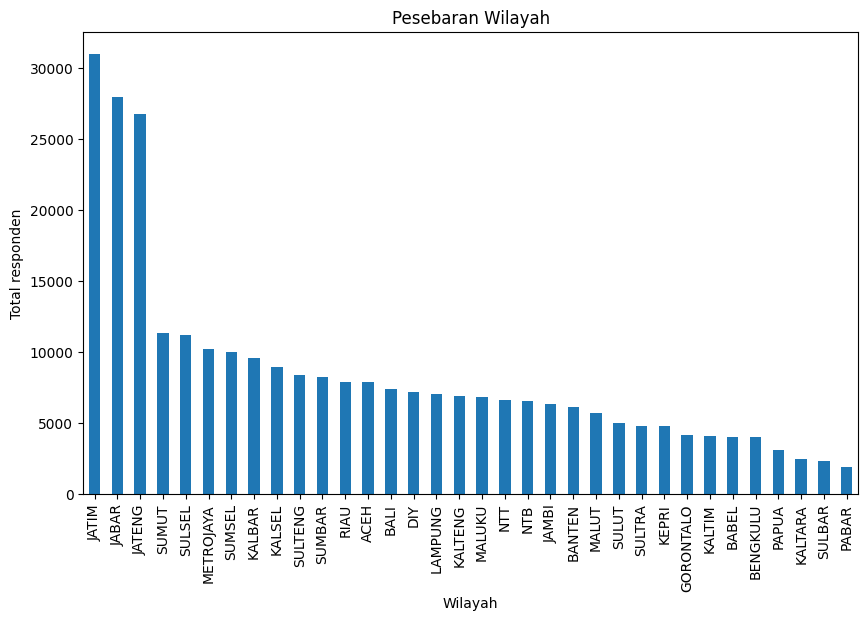

,WILAYAH
JATIM,30990
JABAR,28007
JATENG,26807
SUMUT,11334
SULSEL,11193
METROJAYA,10210
SUMSEL,10023
KALBAR,9564
KALSEL,8967
SULTENG,8423


In [ ]:
#Melakukan visualisasi untuk melihat distribusi responden berdasarkan wilayah
wilayah = df['WILAYAH'].value_counts()

plt.figure(figsize=(10, 6))
wilayah.plot(kind = 'bar')

plt.xlabel('Wilayah')
plt.ylabel('Total responden')
plt.title('Pesebaran Wilayah')
plt.show()

wilayah_count = wilayah.nlargest(10).to_frame()
wilayah_count.style.background_gradient(cmap='Blues')

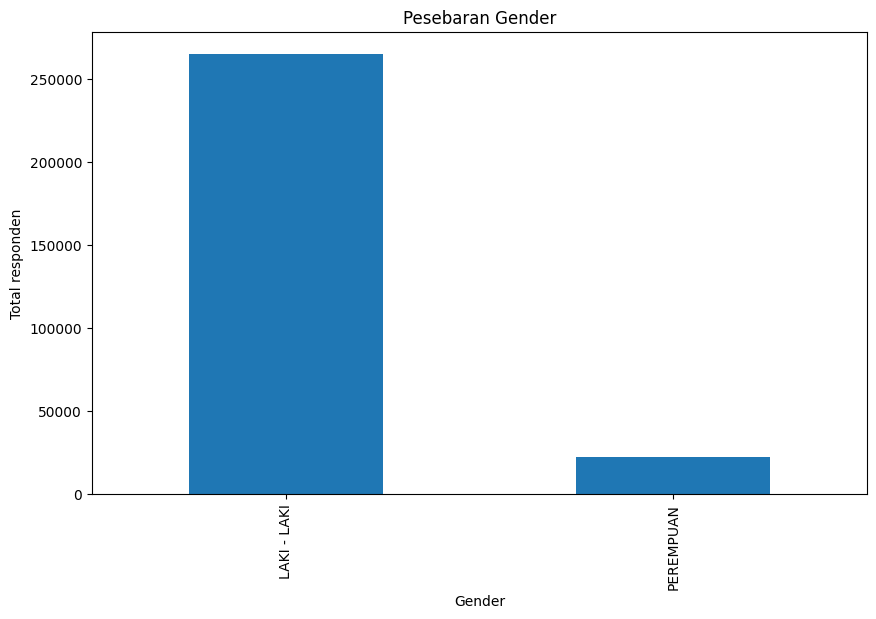

,JENIS KELAMIN
LAKI - LAKI,265406
PEREMPUAN,21938


In [ ]:
#Melakukan visualisasi untuk melihat distribusi responden berdasarkan gender
gender = df['JENIS KELAMIN'].value_counts()

plt.figure(figsize=(10, 6))
gender.plot(kind = 'bar')

plt.xlabel('Gender')
plt.ylabel('Total responden')
plt.title('Pesebaran Gender')
plt.show()

gender_count = gender.to_frame()
gender_count.style.background_gradient(cmap='Blues')

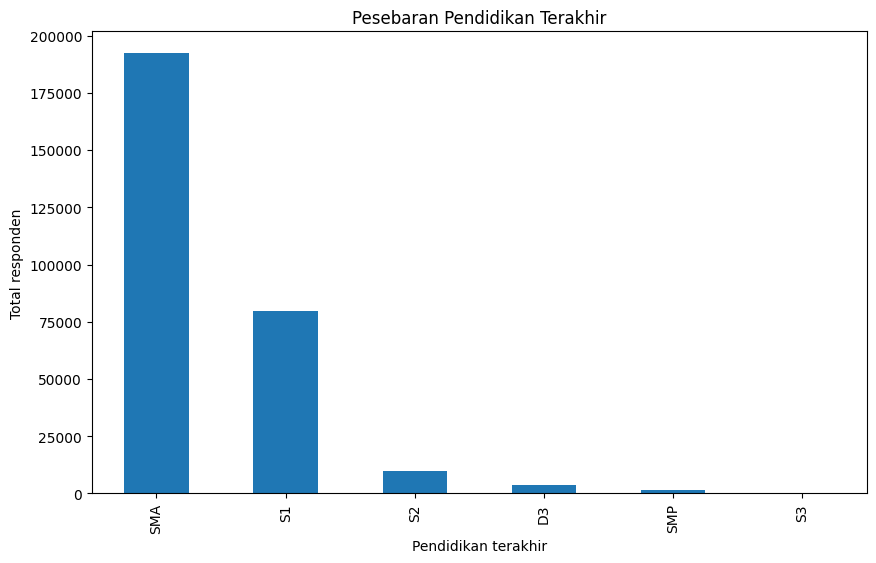

,PENDIDIKAN TERAKHIR
SMA,192189
S1,79837
S2,9823
D3,3821
SMP,1462
S3,212


In [ ]:
#Melakukan visualisasi untuk melihat distribusi responden berdasarkan Pendidikan Terakhir
pendidikan = df['PENDIDIKAN TERAKHIR'].value_counts()

plt.figure(figsize=(10, 6))
pendidikan.plot(kind = 'bar')

plt.xlabel('Pendidikan terakhir')
plt.ylabel('Total responden')
plt.title('Pesebaran Pendidikan Terakhir')
plt.show()

pendidikan_count = pendidikan.to_frame()
pendidikan_count.style.background_gradient(cmap='Blues')

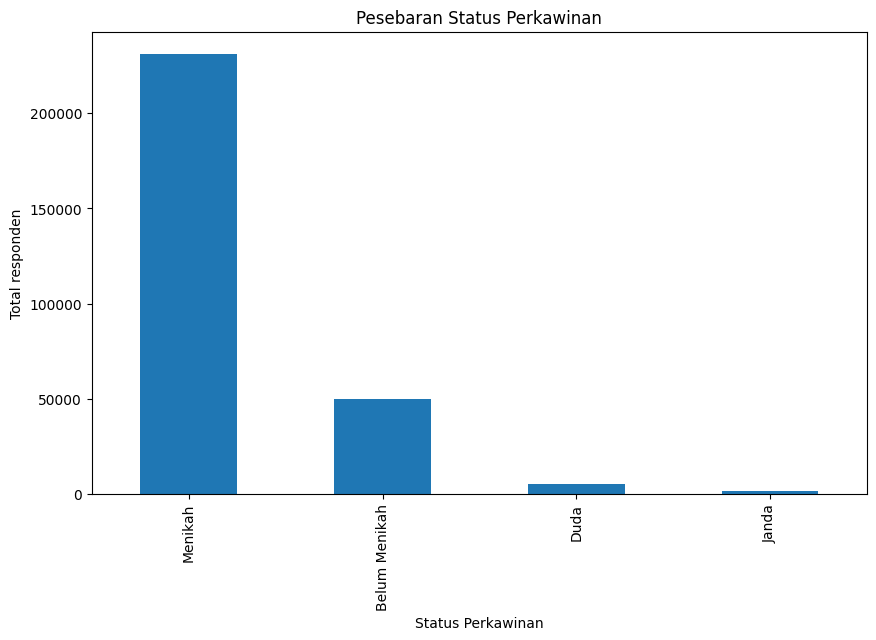

,Status Perkawinan
Menikah,231309
Belum Menikah,49659
Duda,4883
Janda,1493


In [ ]:
#Melakukan visualisasi untuk melihat distribusi responden berdasarkan status perkawinan
status = df['Status Perkawinan'].value_counts()

plt.figure(figsize=(10, 6))
status.plot(kind = 'bar')

plt.xlabel('Status Perkawinan')
plt.ylabel('Total responden')
plt.title('Pesebaran Status Perkawinan')
plt.show()

status_count = status.to_frame()
status_count.style.background_gradient(cmap='Blues')

## Binary Features

In [ ]:
#Membuat list yang berisi kolom-kolom binary
df_binary = ['JENIS KELAMIN','Apakah saudara pernah di diagnosa atau menderita penyakit Jantung ?','Apakah saudara pernah di diagnosa atau menderita penyakit Stroke ?', 'Apakah saudara pernah di diagnosa atau menderita penyakit Diabetes Melitus ?', 'Apakah saudara pernah di diagnosa atau menderita penyakit Hipertensi ?','Apakah saudara pernah di diagnosa atau menderita penyakit Kanker ?','Apakah saudara pernah di diagnosa atau menderita penyakit Ginjal ?','Apakah saudara pernah di diagnosa atau menderita penyakit Tumor ?','Apakah saudara pernah di diagnosa atau menderita penyakit Osteoartritis ?','Apakah saudara pernah di diagnosa atau menderita penyakit Lambung ?','Apakah saudara pernah di diagnosa atau menderita penyakit Liver ?','Apakah saudara pernah di diagnosa atau menderita penyakit  Tuberculosis (TBC) ?','Apakah saudara pernah di diagnosa atau menderita penyakit  Demam Berdarah Dengue (DBD) ?','Apakah saudara pernah di diagnosa atau menderita penyakit  COVID-19 ?','Apakah saudara pernah di diagnosa atau menderita penyakit  HIV/AIDS ?','Apakah saudara pernah di diagnosa atau menderita penyakit  Diare ?','Apakah saudara pernah di diagnosa atau menderita penyakit  Malaria ?','Apakah saudara pernah di diagnosa atau menderita penyakit  Gonore atau Sipilis ?','Apakah saudara pernah di diagnosa atau menderita penyakit  Thypus ?','Apakah saudara pernah di diagnosa atau menderita penyakit  Dermatitis (Skabies)/ peradangan atau iritasi kulit ?','Apakah saudara pernah di diagnosa atau menderita penyakit  Mikosis (infeksi jamur) ?','Mudah lelah ?','Apakah saudara menderita penyakit gigi dan mulut (karies/gigi berlubang)','Apakah saudara merokok ?']

In [ ]:
data_binary = df[df_binary]
data_binary.columns = [col.split()[-2] if ' ' in col else col for col in data_binary.columns]
data_binary = data_binary.rename(columns={'JENIS': 'Gender', 'Melitus': 'Diabetes Melitus', 'Sipilis': 'Gonore dan Sipilis', 'kulit':'Dermatitis (Skabies)/ peradangan atau iritasi kulit','jamur)':'Mikosis','lelah':'mudah lelah','(karies/gigi': 'penyakit gigi dan mulut'})

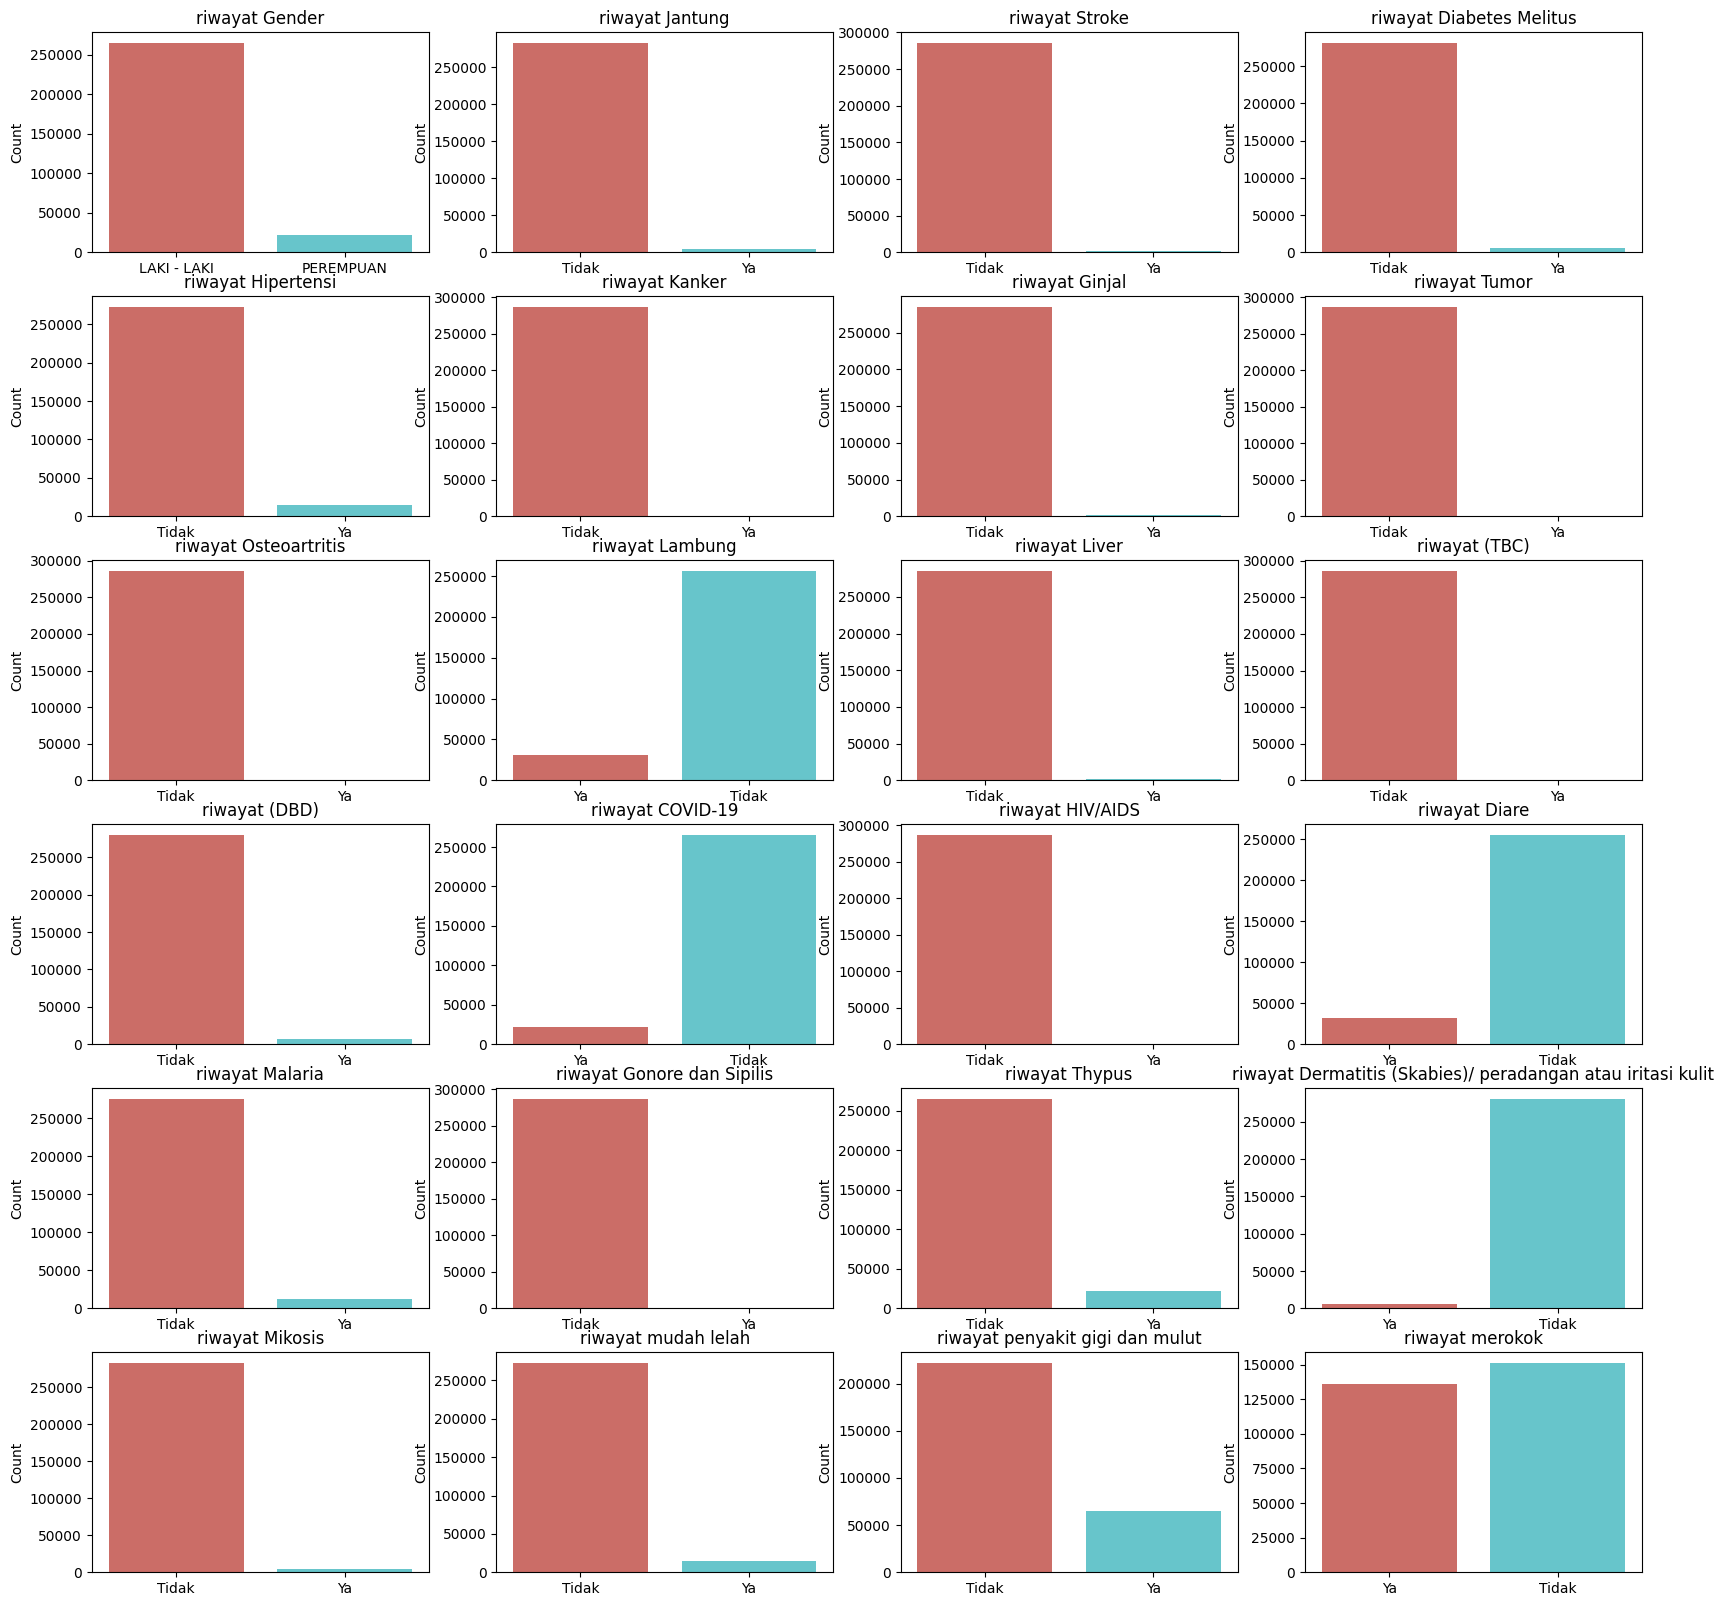

In [ ]:
col = data_binary.columns
grid = gridspec.GridSpec(6, 4)
plt.figure(figsize=(20,20))

for i in range(len(col)):
    ax = plt.subplot(grid[i])
    sns.countplot(x=col[i], data=data_binary, palette='hls')
    ax.set_ylabel('Count', fontsize=10)
    ax.set_xlabel('')
    ax.set_title(f'riwayat {col[i]}', fontsize=12)
    sizes=[]

plt.show()

## Nominal Features

In [ ]:
nom_cols = ['Status Perkawinan',
'Sumber air bersih di tempat tinggal saudara ?',
'Penggunaan air bersih untuk makan & minum bersumber dari : ',
'Apakah terdapat tempat sampah di sekitar rumah? ']

data_nom = df[nom_cols]
data_nom = data_nom.rename(columns={'Sumber air bersih di tempat tinggal saudara ?': 'Sumber air bersih', 'Penggunaan air bersih untuk makan & minum bersumber dari : ': 'Sumber air konsumsi', 'Apakah terdapat tempat sampah di sekitar rumah?': 'Tempat sampah'})

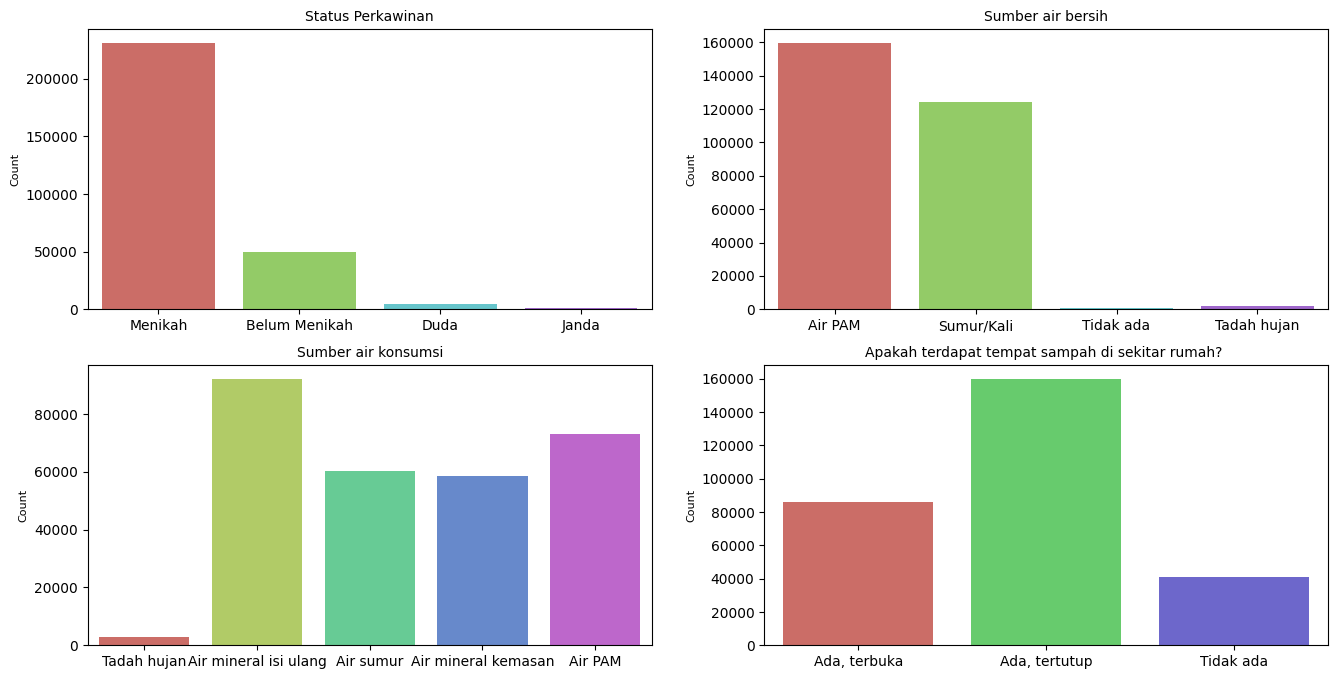

In [ ]:
col = data_nom.columns
grid = gridspec.GridSpec(2, 2)
plt.figure(figsize=(16,8))

for i in range(len(col)):
    ax = plt.subplot(grid[i])
    sns.countplot(x=col[i], data=data_nom, palette='hls')
    ax.set_ylabel('Count', fontsize=8)
    ax.set_xlabel('')
    ax.set_title(f'{col[i]}', fontsize=10)
    #plt.xticks(rotation = 45)
    sizes=[]

plt.show()

# K-Means (Gender, Kelompok umur, IMT)

## Algoritma tanpa Module

In [ ]:
def mean(data):
    'Accurate arithmetic mean'
    if isinstance(data,list)==False:
        data = list(data)
    return fsum(data) / len(data)

def transpose(matrix):
    'Swap rows with columns for a 2-D array'
    return zip(*matrix)

def distance(p, q, sqrt=sqrt, fsum=fsum, zip=zip):
    'Multi-dimensional euclidean distance between points p and q'
    return sqrt(fsum((x1 - x2) ** 2.0 for x1, x2 in zip(p, q)))

def assign_data(centroids, data):
    'Assign data the closest centroid'
    d = defaultdict(list)
    for point in data:
        centroid = min(centroids, key=partial(distance, point))
        d[centroid].append(point)
    return dict(d)

def compute_centroids(groups):
    'Compute the centroid of each group'
    return [tuple(map(mean, transpose(group))) for group in groups]

def k_means(data, k=4, iterations=10):
    'Return k-centroids for the data'
    data = list(data)
    centroids = sample(data, k)
    for i in range(iterations):
        labeled = assign_data(centroids, data)
        centroids = compute_centroids(labeled.values())
    return centroids

def quality(labeled):
    'Mean value of squared distances from data to its assigned centroid'
    return mean(distance(c, p) ** 2 for c, pts in labeled.items() for p in pts)


In [ ]:
## Variable Transformation

df = pd.get_dummies(df, columns=['JENIS KELAMIN'], drop_first=True) # 0 = Laki-laki , 1 = PEREMPUAN
df = df.rename(columns={'JENIS KELAMIN_PEREMPUAN': 'Gender'})
ord_umur = CategoricalDtype(categories=['15 - 24','25 - 34', '35 - 44', '45 - 54', '55 - 64', '≥ 65'], ordered=True)
ord_IMT = CategoricalDtype(categories=['Kurus', 'Sangat Kurus', 'Normal', 'Gemuk', 'Obesitas'], ordered=True)
df['Kelompok Umur'] = df['Kelompok Umur'].astype(ord_umur)
df['IMT'] = df['IMT'].astype(ord_IMT)
df['Kelompok Umur'] = df['Kelompok Umur'].cat.codes
df['IMT'] = df['IMT'].cat.codes


In [ ]:
df[['Gender', 'Kelompok Umur', 'IMT']]=df[['Gender', 'Kelompok Umur', 'IMT']].astype(int)
data1 = df[['Gender', 'Kelompok Umur', 'IMT']]
data1 = [tuple(row) for row in data1.values]

In [ ]:
centroids = k_means(data1, k=4)
kmeans_data1 = assign_data(centroids, data1)

In [ ]:
# Ubah dictionary menjadi dua list terpisah
centroids, data1 = zip(*kmeans_data1.items())

# Buat DataFrame untuk centroid
df_centroids = pd.DataFrame(centroids, columns=['Gender', 'Kelompok Umur', 'IMT'])
df_centroids['cluster'] = range(1, len(centroids) + 1)  # Menambahkan kolom 'cluster'

# Buat DataFrame untuk data points
df_data1 = pd.DataFrame([(item[0], item[1], item[2], cluster) for cluster, items in kmeans_data1.items() for item in items],
                              columns=['Gender', 'Kelompok Umur', 'IMT', 'cluster'])

In [ ]:
df_centroids

,Gender,Kelompok Umur,IMT,cluster
0,0.060175,1.750449,3.074904,1
1,0.104656,0.501406,2.044814,2
2,0.083337,3.215858,2.388686,3
3,0.083927,3.193868,4.000000,4


In [ ]:
df_data1

,Gender,Kelompok Umur,IMT,cluster
0,0,1,4,"(0.06017529209870536, 1.7504487504027246, 3.07..."
1,0,2,2,"(0.06017529209870536, 1.7504487504027246, 3.07..."
2,0,2,4,"(0.06017529209870536, 1.7504487504027246, 3.07..."
3,0,2,3,"(0.06017529209870536, 1.7504487504027246, 3.07..."
4,0,2,4,"(0.06017529209870536, 1.7504487504027246, 3.07..."
...,...,...,...,...
287339,0,3,4,"(0.0839269123567668, 3.193868070610096, 4.0)"
287340,1,3,4,"(0.0839269123567668, 3.193868070610096, 4.0)"
287341,0,3,4,"(0.0839269123567668, 3.193868070610096, 4.0)"
287342,1,3,4,"(0.0839269123567668, 3.193868070610096, 4.0)"


In [ ]:
import plotly.express as px
fig = px.scatter_3d(
    df_data1,
    x='Gender',
    y='Kelompok Umur',
    z='IMT',
    color='cluster',
    size_max=10,
    opacity=0.8,
    title='Clusters untuk Gender, Kelompok umur, dan IMT'
)

# Tampilkan plot
fig.show()

## Parallel Programming

Untuk Algoritma K-Means dengan pemrograman parallel dapat dilihat pada tautan berikut: https://colab.research.google.com/drive/14Bd2g6n-zTAUZqXWLqaZMlx37XBiEWSL#scrollTo=mu_TOmmio8A-



# INSIGHT

# EDA: INSIGHT

***Pre-processing***
- Pada awalnya, DataFrame terdiri dari **289801** baris dan **79** kolom.
- Ditemukan missing value pada pertanyaan lanjutan saat responden menjawab 'tidak' pada pertanyaan awal, hal tersebut karena ketika responden menjawab 'tidak', pertanyaan lanjutan tidak perlu dijawab oleh responden, sehingga missing value terjadi pada pertanyaan lanjutan.
- Terdapat beberapa kolom yang di drop karena mengandung banyak outliers, yaitu 'usia', 'lama berdinas', 'tinggi badan', dan 'ID'.
- Setelah dilakukan penghapusan outliers dan drop kolom, shape DataFrame berubah menjadi **(287344, 74)**.


***Data Aggregation***
- Setelah melakukan fungsi agregasi pada kolom 'Kelompok Umur' dan 'Nilai IMT' interpretasi data menjadi lebih mudah. Tampilan data juga menjadi lebih mudah untuk dipahami.
- Sebagai contoh, kita dapat melihat nilai imt dan kategorinya berdasarkan kelompok umur, yang bisa memudahkan untuk menginterpretasi data.
- Misalnya, kita dapat melihat pada kelompok umur 15-24 rata-rata nilai imt untuk kategori gemuk adalah 25.858534, kategori kurus 17.995289, kategori normal 22.322234,kategori obesitas 29.443339, kategori sangat kurus 15.036047.
- Kemudian kita dapat melihat pada kelompok umur 15-24 jumlah responden dengan kategori IMT gemuk adalah sebanyak 4789, kategori IMT kurus adalah sebanyak 225, kategori IMT normal adalah sebanyak 30384, kategori IMT obesitas adalah sebanyak 2722, kategori IMT sangat kurus adalah sebanyak 43.
- Selain itu juga kita dapat melihat nilai standar deviasi, nilai minimun, dan nilai maximum dari IMT.


***Distribusi Responden*** (bikin dalam persen)
- Setelah dilakukan visualisasi untuk melihat distribusi responden, kami mendapatkan beberapa kesimpulan.
Untuk distribusi responden **berdasarkan wilayah**, terlihat bahwa sebagian besar responden berasal dari **pulau Jawa**. Sebanyak (55.17%) responden berasal dari pulau jawa, tepatnya **jatim** yang menduduki peringkat tertinggi (20%)
- Untuk distribusi responden berdasarkan wilayah, terlihat bahwa hampir seluruh responden adalah laki-laki (92%)
- Untuk distribusi responden berdasarkan pendidikan terakhir, terlihat bahwa responden yang menempuh pendidikan hingga SMA adalah yang paling banyak (67%).
- Untuk distribusi responden berdasarkan status perkawinan, terlihat bahwa responden yang telah menikah adalah yang paling banyak (80.5%)


***Binary***
- Berdasarkan hasil visualisasi, terlihat bahwa sebagian besar responden tidak memiliki riwayat penyakit tertentu (ditandai dengan tinggi bar dari label 'tidak')
- Kemudian jika dibandingkan dengan seluruh riwayat penyakit tertentu, tinggi bar tertinggi untuk label 'ya' terdapat pada riwayat penyakit gigi dan mulut.


***Nominal Features***
- Berdasarkan hasil visualisasi untuk kolom dengan tipe data nominal, dapat dilihat bahwa sebagian besar responden berstatus menikah
- Kemudian sumber air bersih yang digunakan oleh sebagian besar responden berasal dari air PAM
- Sedangkan untuk sumber air yang dikonsumsi sebagian besar responden adalah mineral isi ulang
- Dan sebagian besar responden memiliki tempat sampah di sekitar rumah yang tertutup.

# K-Means:
Grafik 3D di atas menunjukkan hasil clustering data. Berdasarkan hasil kode tersebut, data dibagi menjadi 4 cluster, yaitu:

- Cluster 1: Pria dan wanita berusia 18-29 tahun dengan nilai IMT normal.
- Cluster 2: Pria dan wanita berusia 30-39 tahun dengan nilai IMT kelebihan berat badan atau obesitas.
- Cluster 3: Pria dan wanita berusia 40 tahun ke atas dengan nilai IMT normal atau kelebihan berat badan.
- Cluster 4: Pria dan wanita berusia 40 tahun ke atas dengan nilai IMT obesitas.

Interpretasi dari hasil clustering tersebut adalah sebagai berikut:
- Cluster 1: Kelompok ini terdiri dari orang-orang yang berusia muda dan memiliki nilai IMT normal. Kelompok ini mungkin memiliki gaya hidup yang sehat, seperti berolahraga secara teratur dan mengonsumsi makanan yang sehat.
- Cluster 2: Kelompok ini terdiri dari orang-orang yang berusia paruh baya dan memiliki nilai IMT kelebihan berat badan atau obesitas. Kelompok ini mungkin memiliki gaya hidup yang kurang sehat, seperti kurang berolahraga dan mengonsumsi makanan yang tidak sehat.
- Cluster 3: Kelompok ini terdiri dari orang-orang yang berusia lanjut dan memiliki nilai IMT normal atau kelebihan berat badan. Kelompok ini mungkin memiliki gaya hidup yang bervariasi, tergantung pada kondisi kesehatan masing-masing.
- Cluster 4: Kelompok ini terdiri dari orang-orang yang berusia lanjut dan memiliki nilai IMT obesitas. Kelompok ini mungkin memiliki gaya hidup yang kurang sehat, seperti kurang berolahraga dan mengonsumsi makanan yang tidak sehat.

# Kesimpulan

Melalui analisis eksploratif data (EDA) dan penerapan algoritma K-Means Clustering pada dataset ini, kita dapat merumuskan wawasan mendalam terkait dengan profil responden. Mayoritas responden adalah laki-laki dengan usia dominan antara 18-29 tahun dan memiliki nilai Indeks Massa Tubuh (IMT) yang normal. Distribusi responden didominasi oleh partisipan dari Pulau Jawa, khususnya Jawa Timur. Secara keseluruhan, mayoritas responden menunjukkan status perkawinan menikah, tingkat pendidikan hingga Sekolah Menengah Atas (SMA), serta tidak memiliki riwayat penyakit tertentu, meskipun terdapat puncak pada riwayat penyakit gigi dan mulut.

Lebih lanjut, hasil K-Means Clustering memberikan pemisahan visual data berdasarkan tiga variabel kunci: Jenis Kelamin, Kelompok Umur, dan Nilai IMT. Cluster 1 terdiri dari pria dan wanita berusia 18-29 tahun dengan nilai IMT normal, sementara Cluster 2 mencakup responden berusia 30-39 tahun dengan nilai IMT kelebihan berat badan atau obesitas. Di sisi lain, Cluster 3 melibatkan pria dan wanita berusia 40 tahun ke atas dengan nilai IMT normal atau kelebihan berat badan.

Keseluruhan analisis memberikan gambaran menyeluruh tentang karakteristik dan distribusi responden, yang dapat menjadi dasar bagi pengambilan keputusan lebih lanjut, terutama dalam konteks kesehatan dan perilaku masyarakat. Saran untuk penelitian lanjutan mencakup investigasi mendalam terkait faktor-faktor kesehatan dan strategi peningkatan partisipasi dari wilayah-wilayah di luar Pulau Jawa.

